In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer, MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Determinar el mejor metodo de estandarizacion

In [3]:
# Lectura de los datos
df = pd.read_csv("../data/superstore_clean.csv")

In [4]:
data = df.copy()

In [5]:
cols = data.select_dtypes([np.number]).columns
print (cols)

Index(['Education_Graduation', 'Education_PhD', 'Education_Master',
       'Education_Basic', 'Marital_Status_Divorced', 'Marital_Status_Single',
       'Marital_Status_Married', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Complain', 'Edad', 'Dt_Customer_year',
       'Dt_Customer_q', 'Dt_Customer_m', 'tiempo_participacion'],
      dtype='object')


In [6]:
pruebas = data
objetivo = pruebas.Response
columnas = pruebas[['Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']]



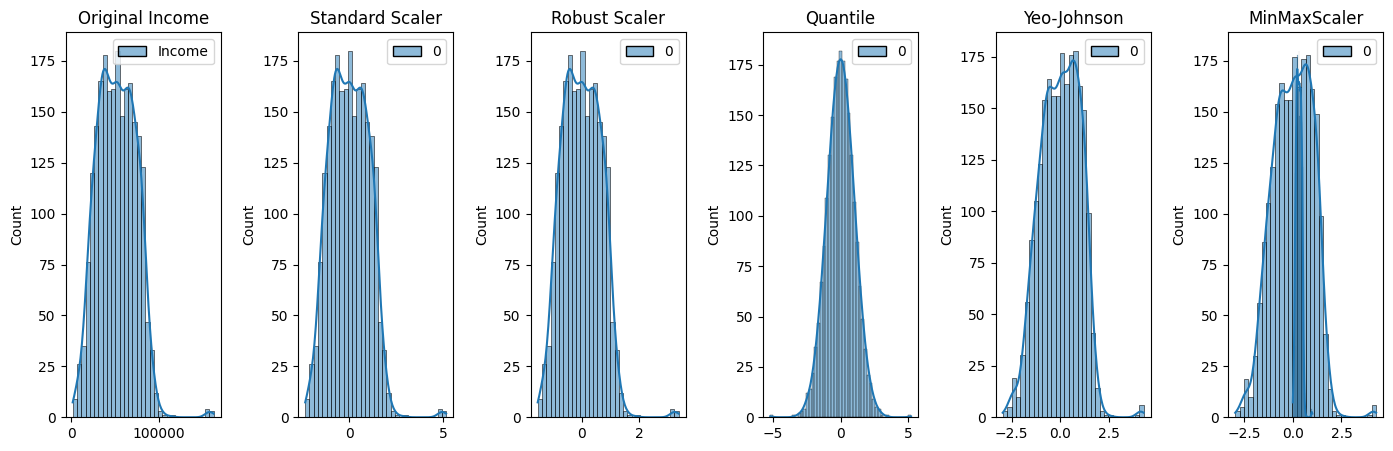

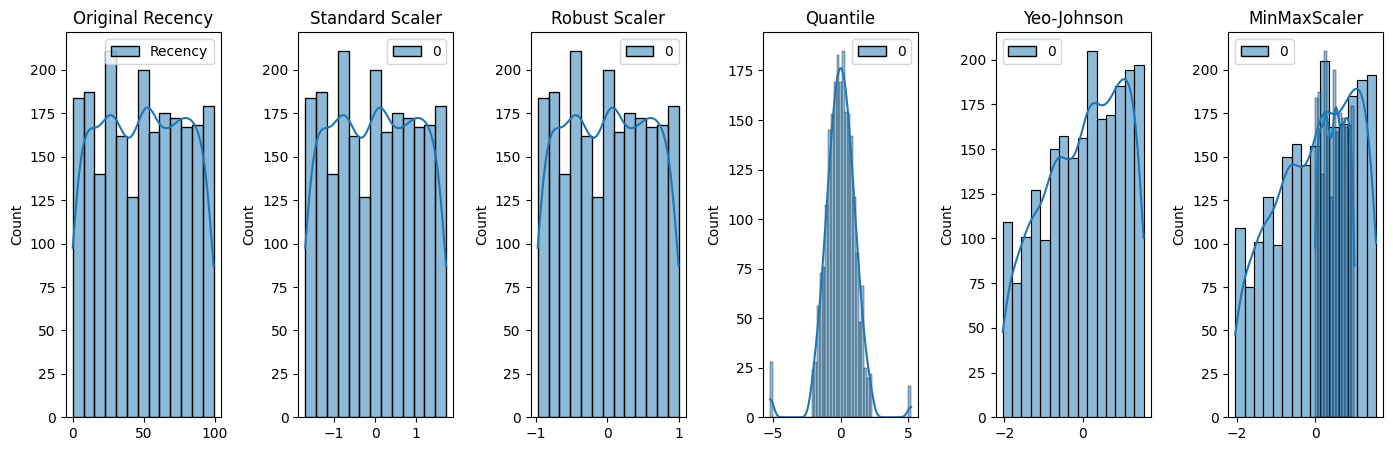

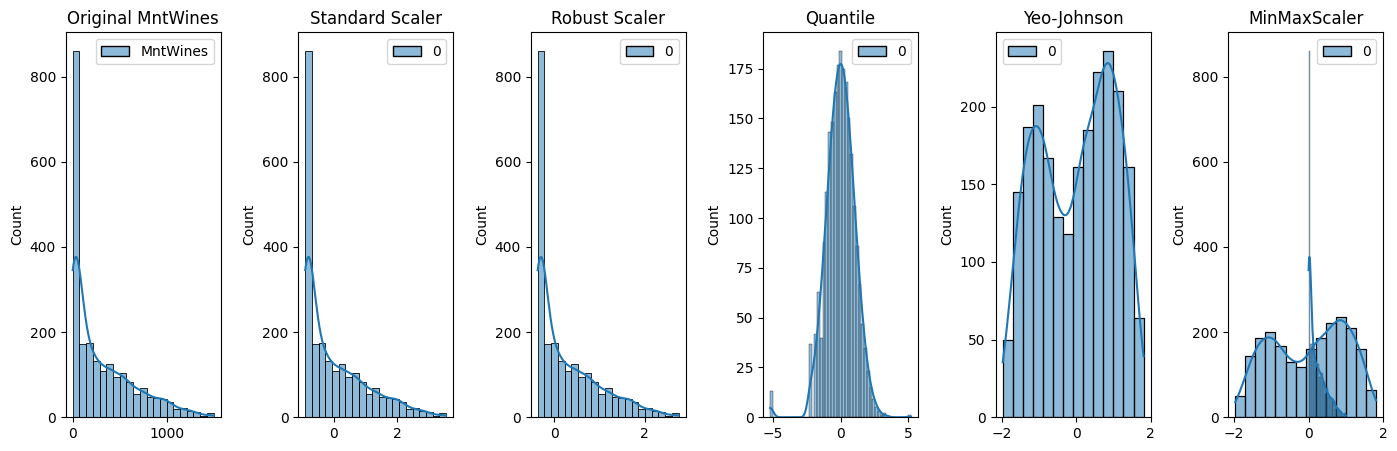

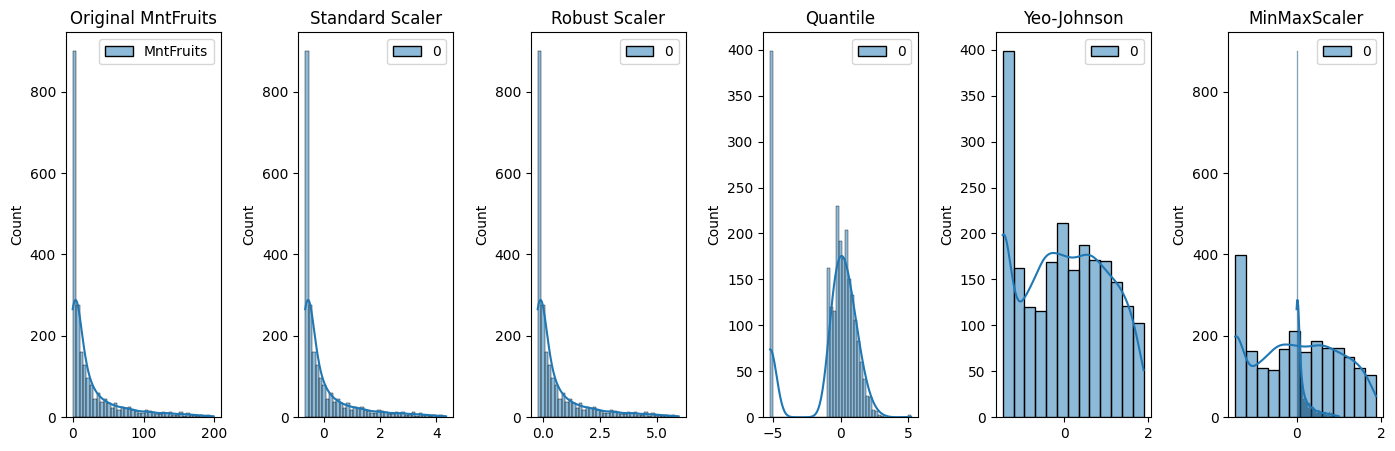

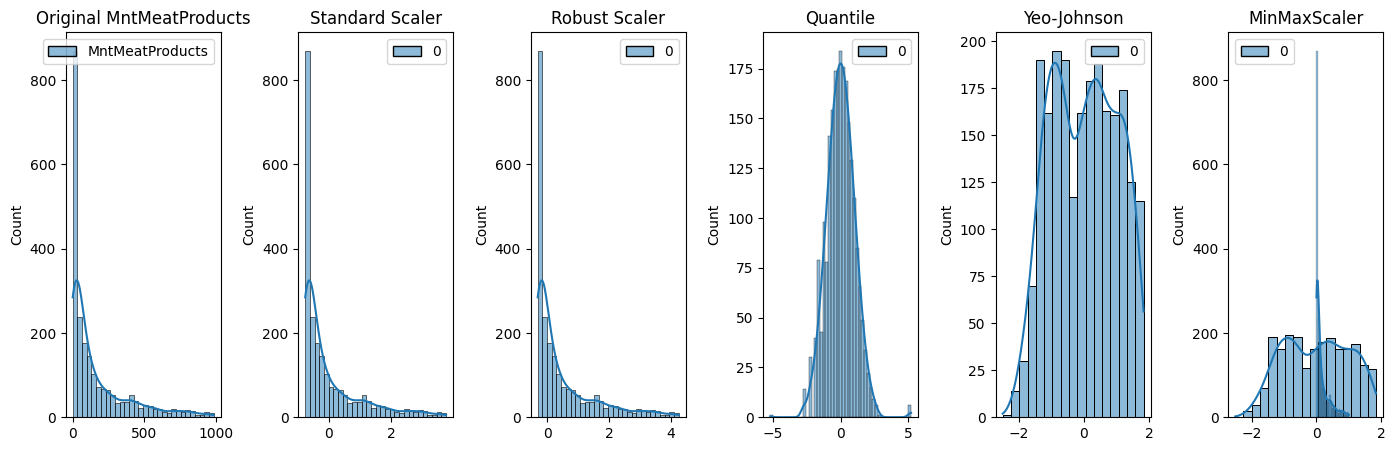

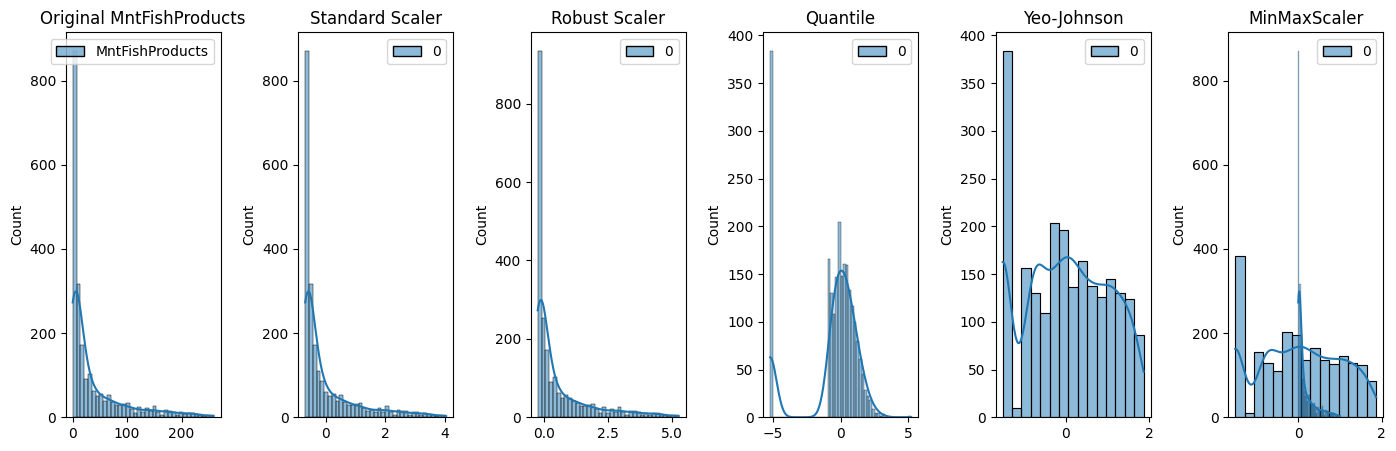

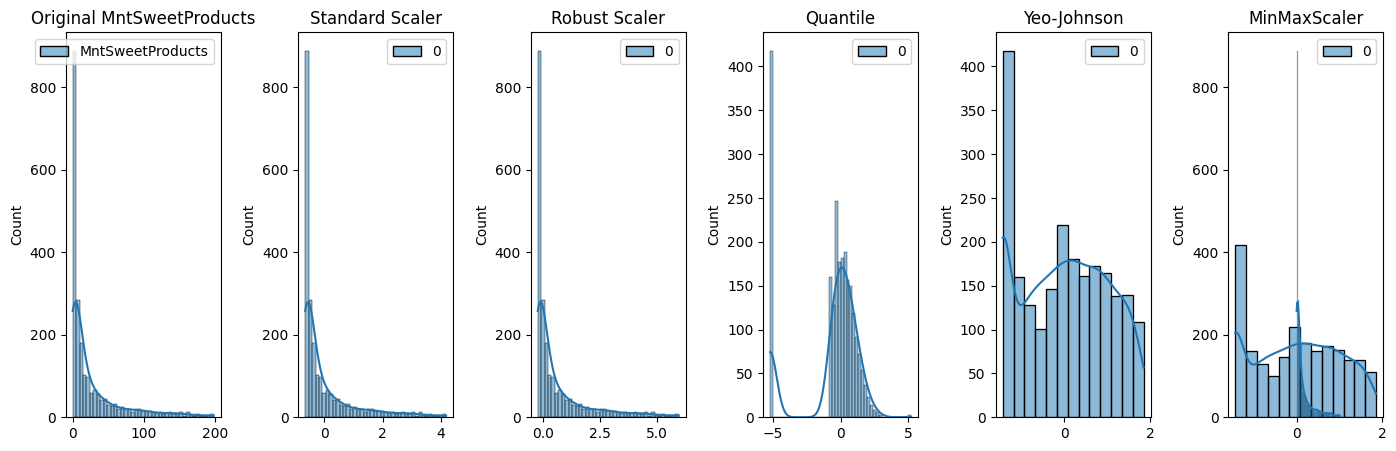

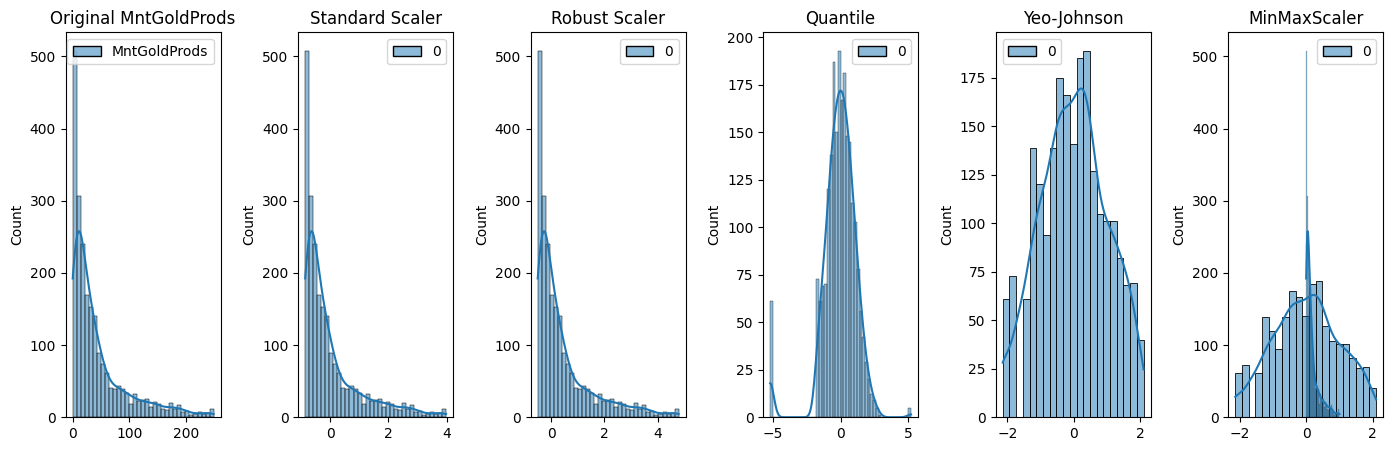

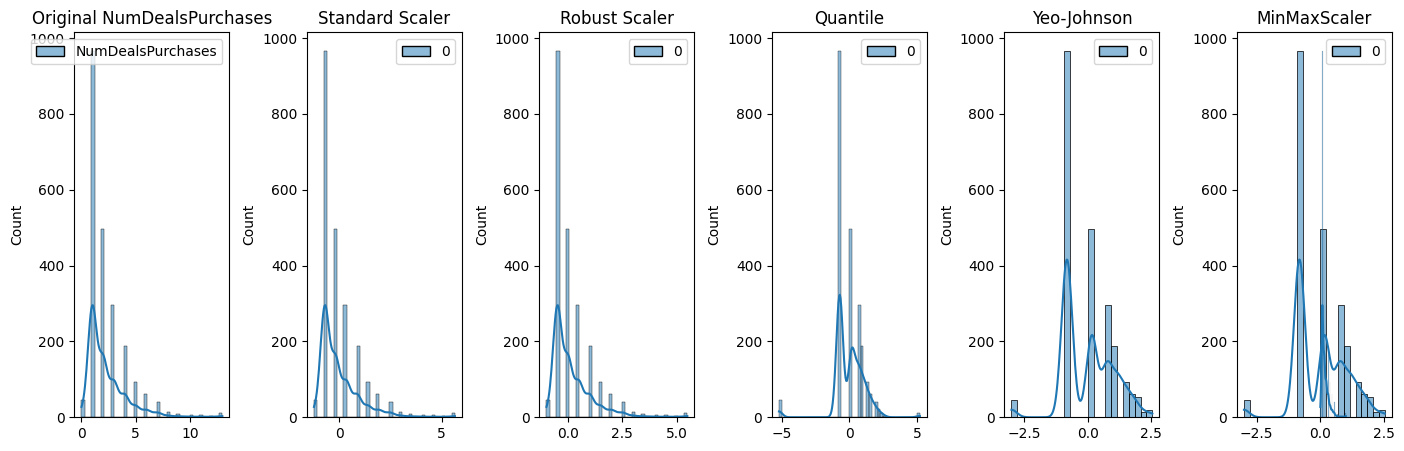

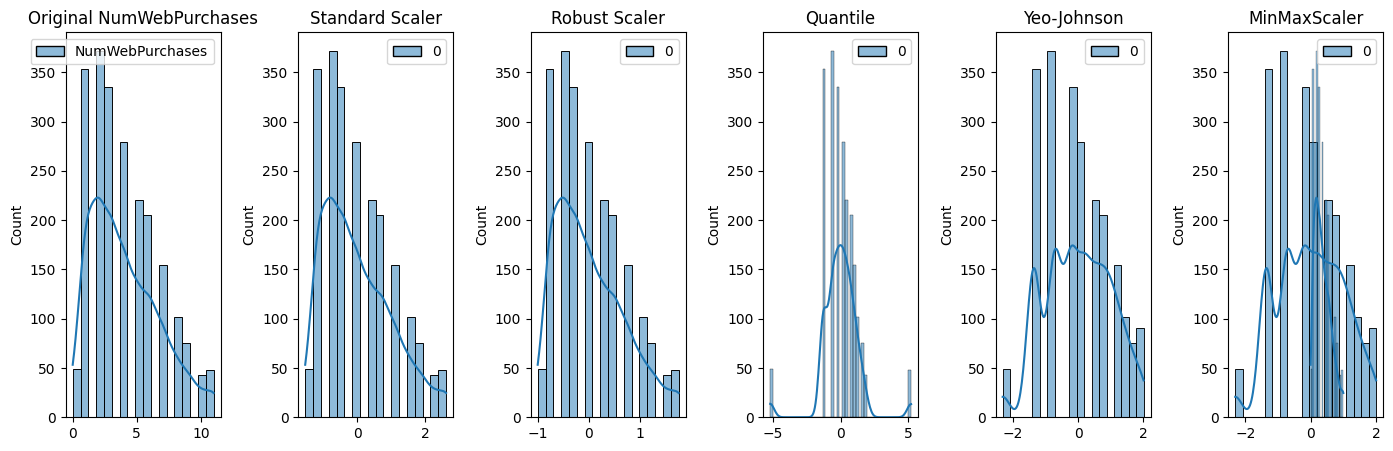

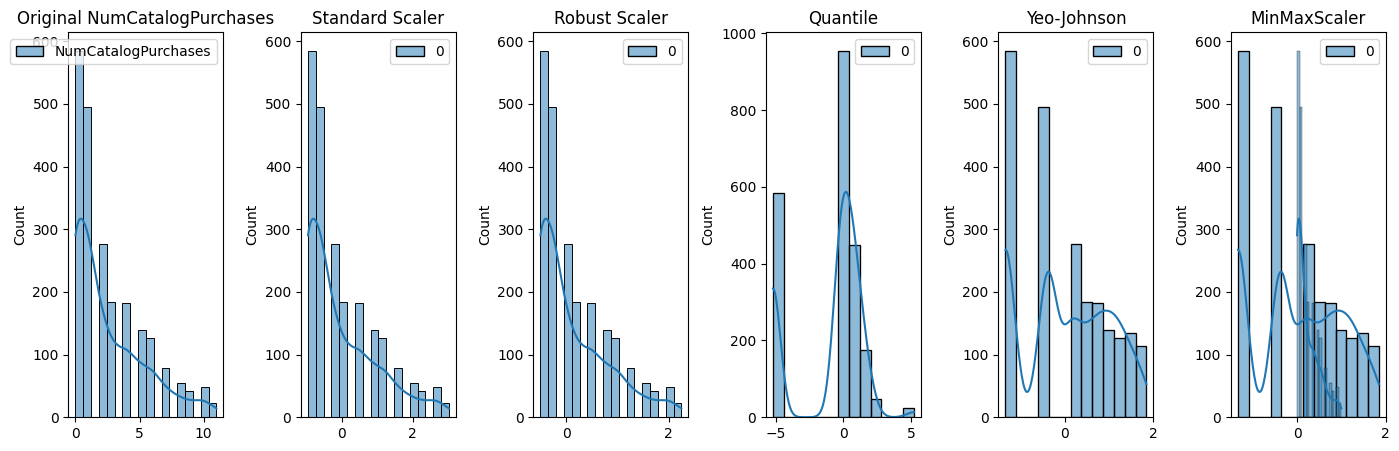

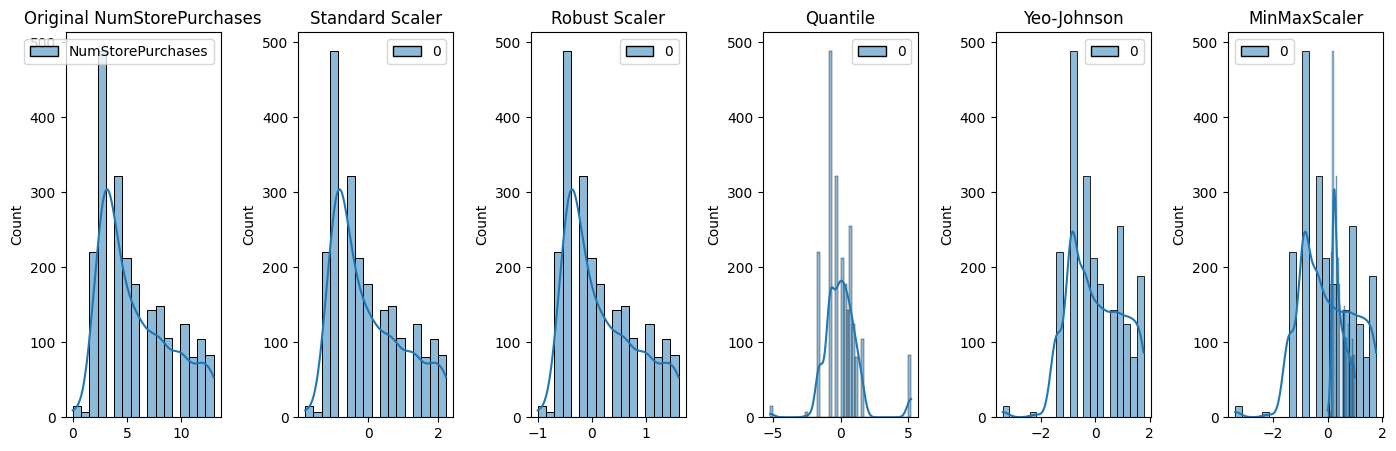

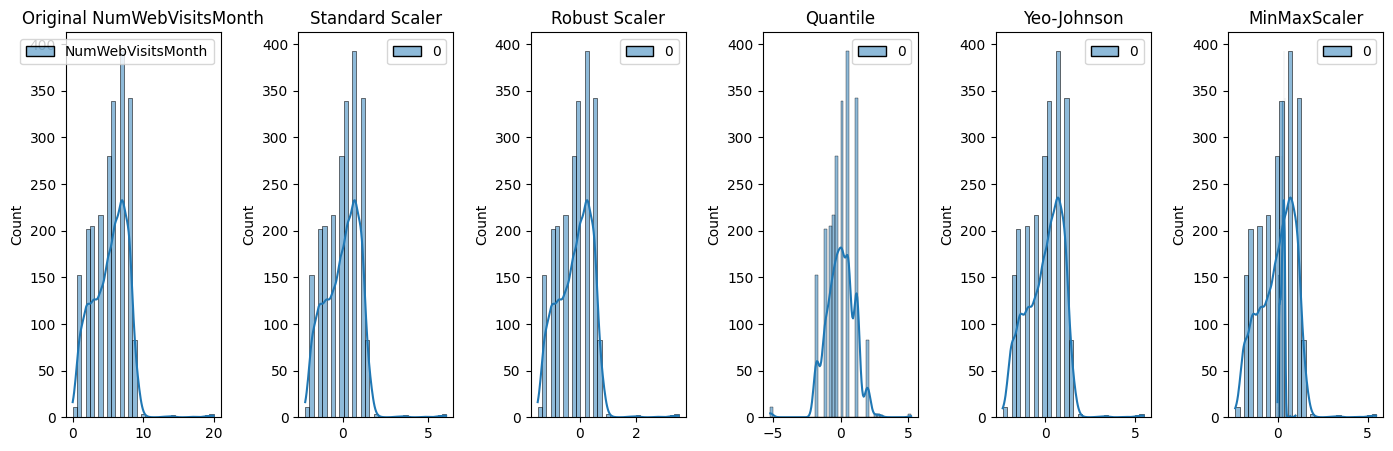

In [10]:
# Separa las variables numericas
ss = StandardScaler()
rs = RobustScaler()
qt = QuantileTransformer(output_distribution='normal')
yj = PowerTransformer(method = 'yeo-johnson')
bc = PowerTransformer(method='box-cox')
minmax = MinMaxScaler()


# Evalua todo
for col in columnas:
    X = pruebas[[col]]
    standard = ss.fit_transform(X)
    robust = rs.fit_transform(X)
    quantile = qt.fit_transform(X)
    yeo = yj.fit_transform(X)
    boxcox = bc.fit_transform(X+1)
    minmaxs = minmax.fit_transform(X)

    plt.figure(figsize=(20,5))
    plt.subplot(1,7,1)
    plt.title("Original " + col)
    sns.histplot(X, kde=True)
    plt.subplot(1,7,2)
    plt.title('Standard Scaler')
    sns.histplot(standard, kde=True)
    plt.subplot(1,7,3)
    plt.title('Robust Scaler')
    sns.histplot(robust, kde=True)
    plt.subplot(1,7,4)
    plt.title('Quantile')
    sns.histplot(quantile, kde=True)
    plt.subplot(1,7,5)
    plt.title('Yeo-Johnson')
    sns.histplot(yeo, kde=True)
    plt.subplot(1,7,6)
    plt.title('BoxCox')
    sns.histplot(boxcox, kde=True)
    plt.subplot(1,7,6)
    plt.title('MinMaxScaler')
    sns.histplot(minmaxs, kde=True)
    plt.subplots_adjust(wspace=0.5)
# fig.tight_layout()
plt.show()
    
# Para este ejercicio es mejor la estandarizacion por quantiles